# Depression, Anxiety, Stress

### Setup

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
warnings.filterwarnings('ignore')

### Load CSV

In [6]:
df = pd.read_csv("data/data.csv", sep="\t")
df.head(15)

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology
5,1,18,6116,1,28,3193,2,2,12542,1,8,6150,3,40,6428,1,4,17001,1,33,2944,3,7,8626,3,14,9639,2,20,6175,1,34,6008,2,21,9267,1,41,5290,3,1,25694,2,9,7634,4,37,8513,2,25,9078,1,15,4381,1,23,6647,2,36,6250,1,39,3842,1,16,7876,1,27,3124,2,12,6836,1,31,12063,1,3,9264,1,35,3957,1,42,2537,3,17,10880,2,5,8462,2,32,5615,1,30,11412,4,6,5112,1,29,3070,3,10,13377,2,38,4506,2,24,17227,2,13,7844,1,26,20253,1,22,8528,1,11,4370,2,19,10310,US,2,4,349,213,2,1,6,1,7,7,7,2,6,7,1,1,0,1,1,0,0,

### Basic Understanding

In [13]:
df.shape

(39775, 172)

In [14]:
df.columns

Index(['Q1A', 'Q1I', 'Q1E', 'Q2A', 'Q2I', 'Q2E', 'Q3A', 'Q3I', 'Q3E', 'Q4A',
       ...
       'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object', length=172)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [17]:
df.select_dtypes("object").columns

Index(['country', 'major'], dtype='object')

In [18]:
df.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.00000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,3.977500e+04,3.977500e+04,3.977500e+04,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,21.499837,7.128728e+03,2.521458,21.492118,5.919306e+03,2.540214,21.562866,5.724097e+03,1.924928,21.528422,9.776971e+03,2.480427,21.569227,4.444627e+03,2.669591,21.582778,1.833083e+04,2.447316,21.417574,9.157494e+03,2.803294,21.434041,5.490152e+03,2.425669,21.485808,6.570469e+03,2.784538,21.501446,3.931872e+03,2.580264,21.571791,1.034875e+04,1.826901,21.501672,5.243594e+03,2.519573,21.459485,6.446743e+03,2.658605,21.497021,5.197918e+03,2.477536,21.530685,7.293520e+03,1.946298,21.549994,1.124446e+04,2.323042,21.519899,4.965477e+03,2.349591,21.566989,5.596290e+03,2.344488,21.516229,6.865094e+03,1.562288,21.479246,4.603325e+03,2.437109,21.531263,8.142970e+03,2.184312,21.563193,1.408290e+04,2.658580,21.445179,5.336940e+03,2.612344,21.527366,8.448039e+03

In [19]:
df.describe(include="O")

,country,major
count,39773,28372
unique,145,5309
top,MY,English
freq,21605,1026


### Separating the data into distinct groups so that it is easier to read, and doing basic analysis

In [29]:
question_cols = [f"Q{i+1}A" for i in range(42)]
df_questions = df[question_cols]
df_questions.head(5)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3


In [43]:
depression_qu = [f"Q{i}A" for i in [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]]
df_depression = df[depression_qu]
df_depression["DepressionAvg"] = (df_depression.sum(axis=1) / len(depression_qu))
df_depression.head(5)

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,Q34A,Q37A,Q38A,Q42A,DepressionAvg
0,2,4,1,4,4,3,1,4,4,4,3,1,2,4,2.928571
1,2,4,2,4,3,4,2,2,3,2,2,4,2,2,2.714286
2,4,4,4,4,4,4,4,4,1,4,4,4,4,4,3.785714
3,2,3,3,1,2,3,1,1,2,3,4,2,1,2,2.142857
4,3,4,3,4,3,4,3,2,4,3,4,3,3,3,3.285714


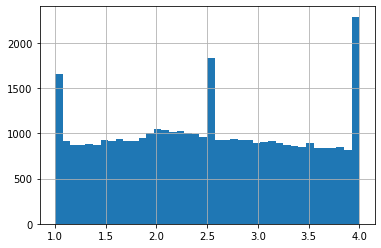

In [61]:
df_depression["DepressionAvg"].hist(bins=40)

In [44]:
anxiety_qu = [f"Q{i}A" for i in [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41]]
df_anxiety = df[anxiety_qu]
df_anxiety["AnxietyAvg"] = (df_anxiety.sum(axis=1) / len(anxiety_qu))
df_anxiety.head(5)

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,Q30A,Q36A,Q40A,Q41A,AnxietyAvg
0,4,4,4,2,4,3,3,4,4,3,2,4,3,4,3.428571
1,1,3,3,3,3,1,1,1,2,4,3,3,1,2,2.214286
2,1,1,1,2,4,2,1,2,2,1,2,4,2,1,1.857143
3,3,1,4,3,2,1,2,1,1,1,3,1,4,4,2.214286
4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,3.857143


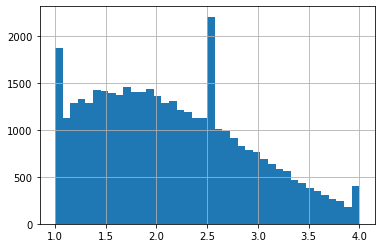

In [62]:
df_anxiety["AnxietyAvg"].hist(bins=40)

In [45]:
stress_qu = [f"Q{i}A" for i in [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]]
df_stress = df[stress_qu]
df_stress["StressAvg"] = (df_stress.sum(axis=1) / len(stress_qu))
df_stress.head(5)

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,Q32A,Q33A,Q35A,Q39A,StressAvg
0,4,4,4,4,4,4,4,4,4,4,4,2,4,4,3.857143
1,4,4,4,2,2,4,2,3,3,3,3,3,2,2,2.928571
2,3,3,3,2,1,1,2,3,2,2,3,1,3,2,2.214286
3,2,3,2,2,1,4,1,1,4,3,1,2,1,3,2.142857
4,2,2,4,2,4,4,4,3,2,2,4,4,3,3,3.071429


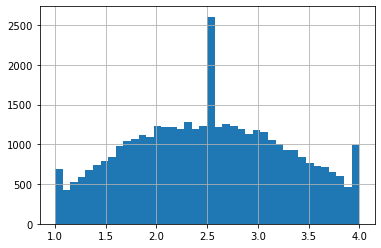

In [63]:
df_stress["StressAvg"].hist(bins=40)

In [30]:
tipi_cols = [f"TIPI{i+1}" for i in range(10)]
df_tipi = df[tipi_cols]
df_tipi.head(5)

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,1,5,7,7,7,7,7,5,1,1
1,6,5,4,7,5,4,7,7,1,5
2,2,5,2,2,5,6,5,5,3,2
3,1,1,7,4,6,4,6,1,6,1
4,2,5,3,6,5,5,5,6,3,3


In [31]:
vcl_cols = [f"VCL{i+1}" for i in range(16)]
df_vcl = df[vcl_cols]
df_vcl.head(5)

,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16
0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1
1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1
2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1
3,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1
4,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1


In [70]:
question_cols_A = [f"Q{i+1}A" for i in range(42)]
question_cols_E = [f"Q{i+1}E" for i in range(42)]
question_cols_I = [f"Q{i+1}I" for i in range(42)]
tipi_cols = [f"TIPI{i+1}" for i in range(10)]
vcl_cols = [f"VCL{i+1}" for i in range(16)]
cols_to_drop = question_cols_A + question_cols_E + question_cols_I + tipi_cols + vcl_cols

df_meta = df.copy()
df_meta.drop(cols_to_drop, axis=1, inplace=True)
df_meta["hasfamily"] = df_meta["familysize"] > 0
df_meta["hasfamily"] = df_meta["hasfamily"].astype("int64")
df_meta.head(5)

,country,source,introelapse,testelapse,surveyelapse,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,hasfamily
0,IN,2,19,167,166,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN,1
1,US,2,1,193,186,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN,1
2,PL,2,5,271,122,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN,1
3,US,2,3,261,336,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology,1
4,MY,2,1766,164,157,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology,1


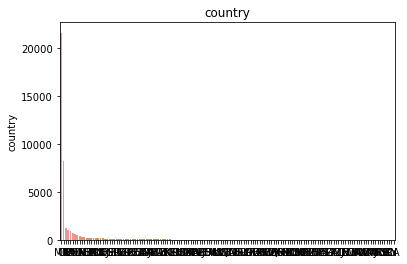

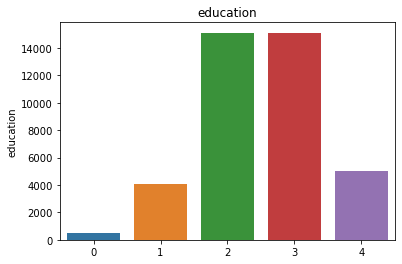

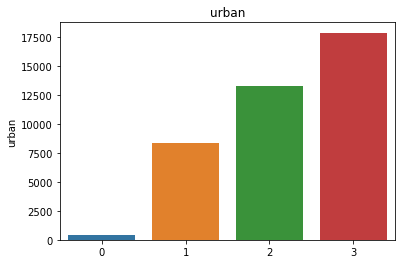

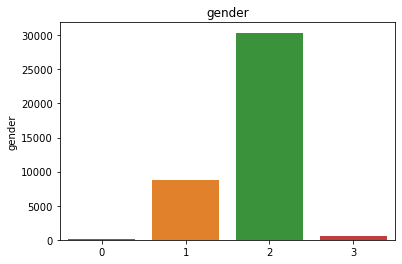

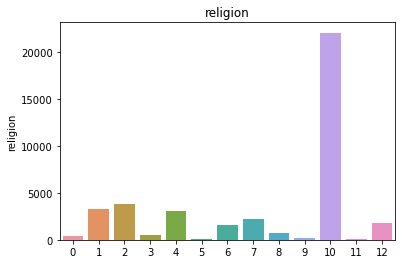

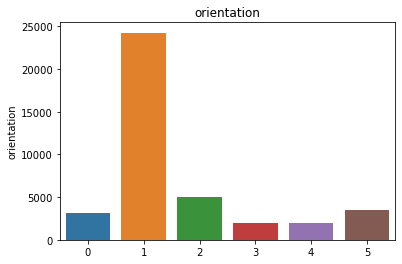

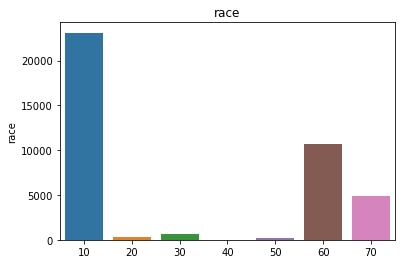

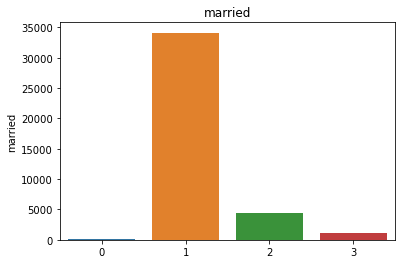

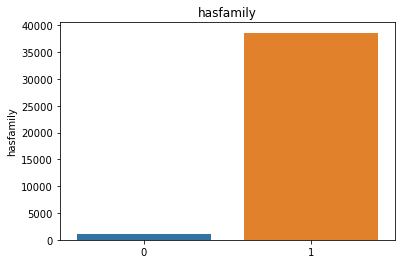

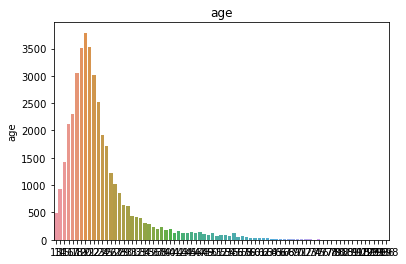

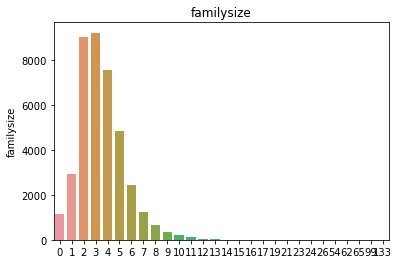

In [86]:
numeric = []
categorical = ["country", "education", "urban", "gender", "religion", "orientation", "race", "married", "hasfamily", "age", "familysize"]

for col in categorical:
    sns.barplot(df_meta[col].value_counts().index, df_meta[col].value_counts()).set_title(col)
    plt.show()

### Finding correlations

In [87]:
df_combined = pd.concat([
    df_depression["DepressionAvg"],
    df_anxiety["AnxietyAvg"],
    df_stress["StressAvg"],
    df_meta[categorical]
], axis=1)

df_combined.head()

,DepressionAvg,AnxietyAvg,StressAvg,country,education,urban,gender,religion,orientation,race,married,hasfamily,age,familysize
0,2.928571,3.428571,3.857143,IN,2,3,2,12,1,10,1,1,16,2
1,2.714286,2.214286,2.928571,US,2,3,2,7,0,70,1,1,16,4
2,3.785714,1.857143,2.214286,PL,2,3,2,4,3,60,1,1,17,3
3,2.142857,2.214286,2.142857,US,1,3,2,4,5,70,1,1,13,5
4,3.285714,3.857143,3.071429,MY,3,2,2,10,1,10,1,1,19,4


##### Heatmaps

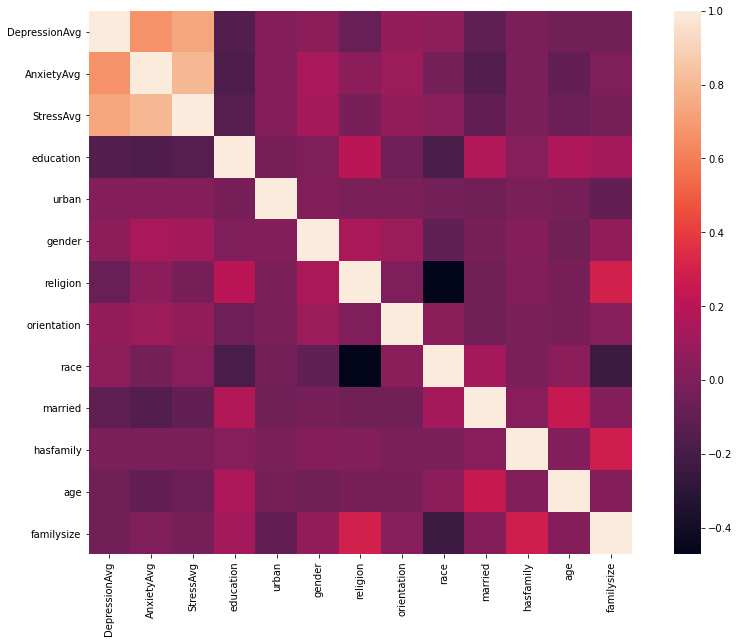

In [93]:
corr_matrix = df_combined.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, vmax=1, square=True)

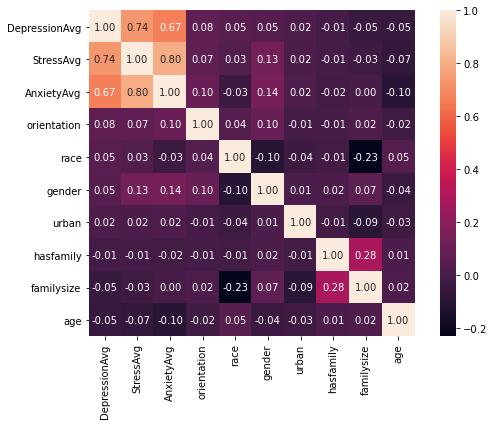

In [90]:
# Depression
k = 10
cols = corr_matrix.nlargest(k, "DepressionAvg")["DepressionAvg"].index
coefs = np.corrcoef(df_combined[cols].values.T)
plt.figure(figsize=(9,6))
hm = sns.heatmap(coefs, cbar=True, annot=True, square=True, fmt=".2f",
                annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
hm

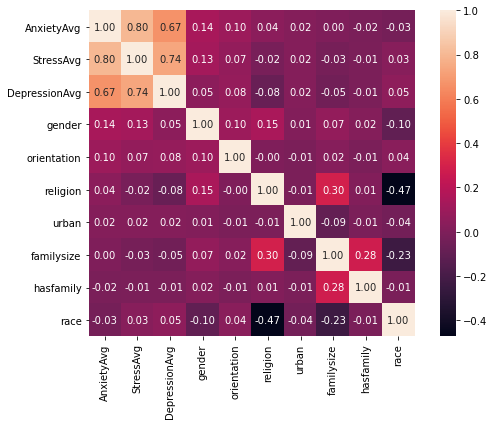

In [91]:
# Anxiety
k = 10
cols = corr_matrix.nlargest(k, "AnxietyAvg")["AnxietyAvg"].index
coefs = np.corrcoef(df_combined[cols].values.T)
plt.figure(figsize=(9,6))
hm = sns.heatmap(coefs, cbar=True, annot=True, square=True, fmt=".2f",
                annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
hm

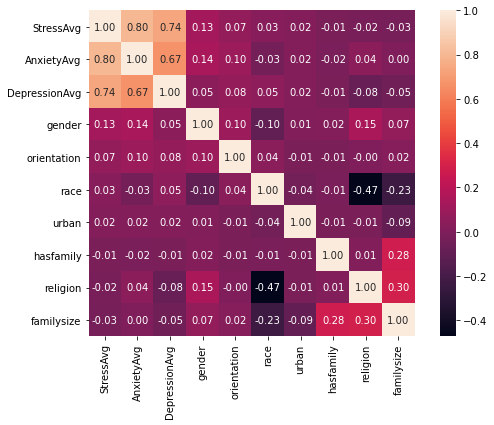

In [92]:
# Stress
k = 10
cols = corr_matrix.nlargest(k, "StressAvg")["StressAvg"].index
coefs = np.corrcoef(df_combined[cols].values.T)
plt.figure(figsize=(9,6))
hm = sns.heatmap(coefs, cbar=True, annot=True, square=True, fmt=".2f",
                annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
hm

### Clustering and Modelling

In [107]:
df_dass = pd.concat([
    df_depression["DepressionAvg"],
    df_anxiety["AnxietyAvg"],
    df_stress["StressAvg"]], axis=1)

df_dass.head()

,DepressionAvg,AnxietyAvg,StressAvg
0,2.928571,3.428571,3.857143
1,2.714286,2.214286,2.928571
2,3.785714,1.857143,2.214286
3,2.142857,2.214286,2.142857
4,3.285714,3.857143,3.071429


In [108]:
columns = list(df_dass.columns)
scaler = MinMaxScaler(feature_range=(0,1))
df_dass = scaler.fit_transform(df_dass)
df_dass = pd.DataFrame(df_dass, columns=columns)
df_dass.head()

,DepressionAvg,AnxietyAvg,StressAvg
0,0.642857,0.809524,0.952381
1,0.571429,0.404762,0.642857
2,0.928571,0.285714,0.404762
3,0.380952,0.404762,0.380952
4,0.761905,0.952381,0.690476


In [114]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df_dass)
predictions = k_fit.labels_
df_dass['Clusters'] = predictions
df_dass.head(15)

,DepressionAvg,AnxietyAvg,StressAvg,Clusters
0,0.642857,0.809524,0.952381,0
1,0.571429,0.404762,0.642857,1
2,0.928571,0.285714,0.404762,1
3,0.380952,0.404762,0.380952,1
4,0.761905,0.952381,0.690476,0
5,0.309524,0.142857,0.285714,2
6,0.738095,0.452381,0.333333,1
7,0.095238,0.095238,0.142857,2
8,0.833333,0.928571,0.785714,0
9,1.000000,0.666667,0.809524,0


In [115]:
df_dass.Clusters.value_counts()

1    15411
2    13196
0    11168
Name: Clusters, dtype: int64

In [117]:
df_dass.groupby('Clusters').mean()

,DepressionAvg,AnxietyAvg,StressAvg
Clusters,,,
0,0.824128,0.668500,0.788439
1,0.536674,0.368366,0.520224
2,0.187167,0.156225,0.243315


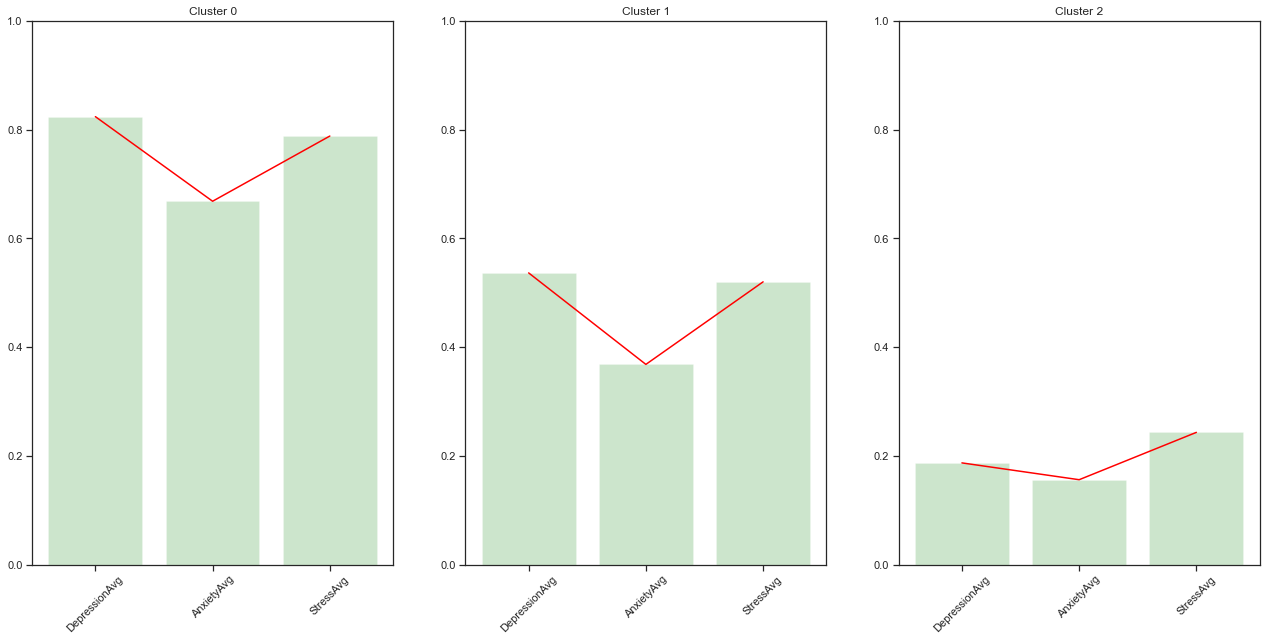

In [123]:
dataclusters = df_dass.groupby('Clusters').mean()
plt.figure(figsize=(22,10))
for i in range(0, 3):
    plt.subplot(1,3,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,1)

In [125]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_dass)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,1.191958,-0.291228,0
1,0.106332,-0.017710,1
2,0.123490,0.388908,1
3,-0.015523,-0.045644,1
4,1.194644,-0.200909,0


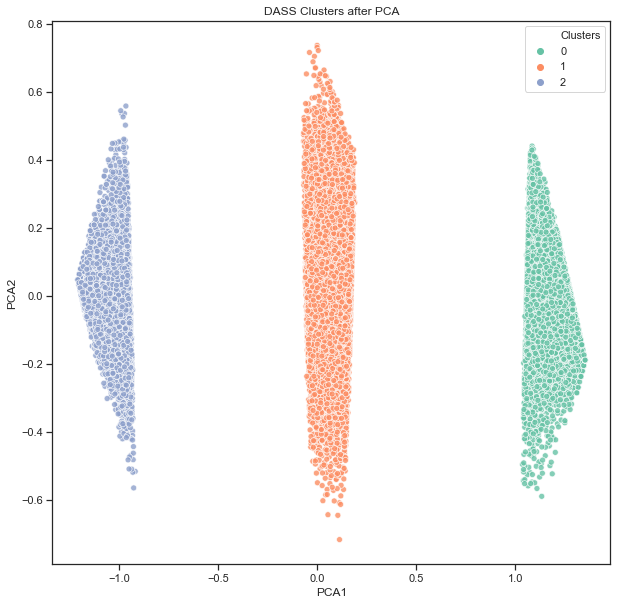

In [126]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('DASS Clusters after PCA');

### Implementing the model to predict another person's level of depression, anxiety and stress

In [129]:
my_data = pd.read_csv("data/my_data.csv")
my_data

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,2,1,3,1,3,2,1,3,2,3,3,2,4,2,1,3,4,3,1,2,3,3,1,3,1,3,3,2,3,2,3,2,3,4,2,2,3,3,2,3,1,3


In [133]:
my_depression_qu = [f"Q{i}A" for i in [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]]
my_df_depression = my_data[my_depression_qu]
my_df_depression["DepressionAvg"] = (my_df_depression.sum(axis=1) / len(my_depression_qu))

my_anxiety_qu = [f"Q{i}A" for i in [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41]]
my_df_anxiety = my_data[my_anxiety_qu]
my_df_anxiety["AnxietyAvg"] = (my_df_anxiety.sum(axis=1) / len(my_anxiety_qu))

my_stress_qu = [f"Q{i}A" for i in [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]]
my_df_stress = my_data[my_stress_qu]
my_df_stress["StressAvg"] = (my_df_stress.sum(axis=1) / len(my_stress_qu))

my_df_dass = pd.concat([
    my_df_depression["DepressionAvg"],
    my_df_anxiety["AnxietyAvg"],
    my_df_stress["StressAvg"]], axis=1)

my_df_dass.head()

,DepressionAvg,AnxietyAvg,StressAvg
0,3.214286,1.5,2.5


In [134]:
my_df_dass = my_df_dass / 4
my_df_dass.head()

,DepressionAvg,AnxietyAvg,StressAvg
0,0.803571,0.375,0.625


In [143]:
my_df_dass["Cluster"] = -1
my_state = k_fit.predict(my_df_dass)
my_df_dass['Cluster'] = my_state
print('My DASS State: ', my_state)
my_df_dass

My DASS State:  [0]


,DepressionAvg,AnxietyAvg,StressAvg,Cluster
0,0.803571,0.375,0.625,0


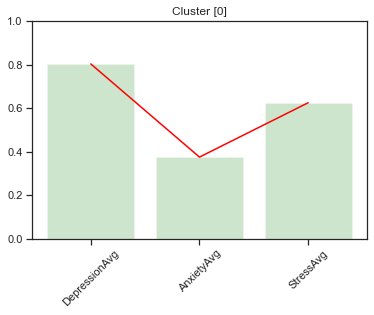

In [144]:
my_df_dass = my_df_dass.drop('Cluster', axis=1)
plt.bar(my_df_dass.columns, my_df_dass.iloc[0], color='green', alpha=0.2)
plt.plot(my_df_dass.columns, my_df_dass.iloc[0], color='red')
plt.title(f"Cluster {my_state}")
plt.xticks(rotation=45)
plt.ylim(0,1);